# Lab Quiz 1 (L2B): Solutions

**Question 1**

In [1]:
def d_solutions(d,a,b):
    '''Compute all integer solutions of x**2 - d * y**2 = 1 for x in [0,a] and y in [0,b].
    
    Input:
        d : positive integer
        a : positive integer defining x interval [0,a]
        b : positive integer defining y interval [0,b]
        
    Output:
        List of tuples of all integer solutions (x,y) of the equation
        x**2 - d * y**2 = 1 for x in [0,a] and y in [0,b].
    
    Example:
        >>> d_solutions(2,3,3)
        [(1, 0), (3, 2)]
    '''
    solutions = []
    for x in range(0,a+1):
        for y in range(0,b+1):
            if x**2 - d*y**2 == 1:
                solutions.append((x,y))
    return solutions

In [2]:
test1 = (sorted(d_solutions(2,3,3)) == [(1, 0), (3, 2)])
test2 = (sorted(d_solutions(6,100,100)) == [(1, 0), (5, 2), (49, 20)])
test3 = (sorted(d_solutions(1,1,1)) == [(1,0)])
print(test1,test2,test3)

True True True


**Question 2**

In [3]:
def poly_add(p,q):
    '''Add polynomials p(x) and q(x).
    
    Represent a polynomial p(x) = a0 + a1*x + a2*x**2 + ... + an*x**n
    as a list of numbers [a0,a1,a2,...,an]. Compute the list representing
    the polynomial p(x) + q(x) by adding the coefficients.
    
    Input:
        p,q : lists representing polynimials
        
    Output:
        List representing p(x) + q(x).
        
    Example:
        >>> poly_add([1,2,3,5,6,7],[0,2,3,2])
        [1, 4, 6, 7, 6, 7]
    '''
    # Let F be the polynomial of higher degree and f the polynomial of smaller degree
    if len(p) > len(q):
        f = q
        F = p
    else:
        f = p
        F = q
    p_plus_q = []
    # Add coefficients of f to F
    for n in range(0,len(f)):
        p_plus_q.append(f[n] + F[n])
    # Higher degree terms are only those of F
    for n in range(len(f),len(F)):
        p_plus_q.append(F[n])
    return p_plus_q

In [4]:
test1 = (poly_add([1],[2]) == [3])
test2 = (poly_add([1,2,3,4],[1,1,1]) == [2,3,4,4])
test3 = (poly_add([2,2,2],[5,0,0,0,0,1]) == [7,2,2,0,0,1])
print(test1,test2,test3)

True True True


**Question 3**

In [5]:
def n_sequence(x0,a,N):
    "Compute Nth term of recursive sequence x_{n+1} = x_n - (x_n**2 - a)/(2*x_n) with initial value x_0 = x0."
    xn = x0
    for n in range(0,N):
        xn = xn - (xn**2 - a)/(2*xn)
    return xn

In [6]:
test1 = (n_sequence(11,121,100) == 11.0)
test2 = (n_sequence(10,99,1) == 9.95)
test3 = abs(n_sequence(4,15,2) - 3.872983870967742) < 10e-15
print(test1,test2,test3)

True True True


**Question 4(a)**

$$
\sin^2 x = \sum_{k=1}^{\infty} (-1)^{k+1} \frac{2^{2k-1} x^{2k}}{(2k)!}
$$

**Question 4(b)**

In [7]:
import numpy as np

In [8]:
def k_sum(x,N):
    '''Compute the Nth partial sum:
    \sum_{k=1}^{N} (-1)^{k+1} \frac{2^{2k-1} x^{2k}}{(2k)!}.
    '''
    return sum([(-1)**(k+1)*(2**(2*k-1)*x**(2*k))/np.math.factorial(2*k) for k in range(1,N+1)])

In [9]:
test1 = (k_sum(0,10) == 0.0)
test2 = (k_sum(2,2) == (2**2 + (-1)*8*2**4/(4*3*2)))
test3 = (k_sum(4,3) == (4**2 + (-1)*8*4**4/(4*3*2) + 2**5*4**6/(6*5*4*3*2)))
print(test1,test2,test3)

True True True


**Question 5**

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def sum_sine_plot(a,m):
    '''Plot a sum of sine functions.
    
    Input:
        a : list of numbers a = [a0,a1,...,aN]
        m : positive integer
        
    Output:
        Plot the function y(t) = \sum_{k_0}^{N} sin(a[k]*t) using m evenly
        spaced point in the interval [0,2pi] and return a NumPy array of
        size m by 2 where the t values are the first column and the
        y values are the second column.
    '''
    t = np.linspace(0,2*np.pi,m)
    y = np.sum([np.sin(a[k]*t) for k in range(0,len(a))],axis=0)
    plt.plot(t,y), plt.xlim([0,2*np.pi])
    plt.show()
    return np.column_stack([t,y])

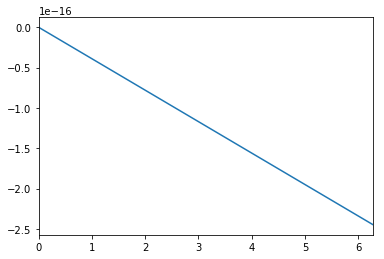

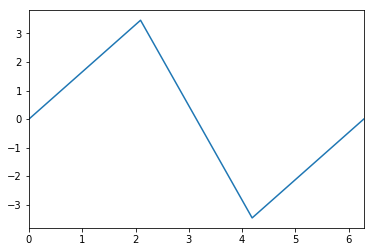

True True


In [12]:
epsilon = 10e-15
test1 = np.linalg.norm(sum_sine_plot([1],2) - np.array([[0,0],[2*np.pi,0]])) < epsilon

t = np.linspace(0,2*np.pi,4)
a = [1,1,1,1]
y = np.sum([np.sin(a[k]*t) for k in range(0,len(a))],axis=0)   
test2 = np.linalg.norm(sum_sine_plot([1,1,1,1],4) - np.column_stack([t,y])) < epsilon
print(test1,test2)

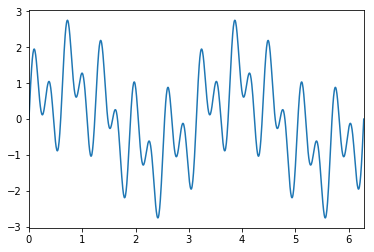

In [13]:
sum_sine_plot([2,10,20],1000);